In [9]:
import os
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt
from torchinfo import summary
from utils import get_clf_report_dfs, plot_confusion_matrix

In [10]:
TRAIN=False
RANDOM_SEED=42
RESULTS_DIR="./results/"
MODEL_NAME="SN"

In [11]:
data = np.load('./dataset/dataset.npz')
X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
X_test = data['X_test']
y_test = data['y_test']
y_mapping = data['y_mapping']

In [12]:
with open(os.path.join(RESULTS_DIR, f"{MODEL_NAME}_contrastive_history.pkl"), 'rb') as f:
    contrastive_history = pickle.load(f)
y_pred = np.load(os.path.join(RESULTS_DIR, f"{MODEL_NAME}_predictions.npy"))

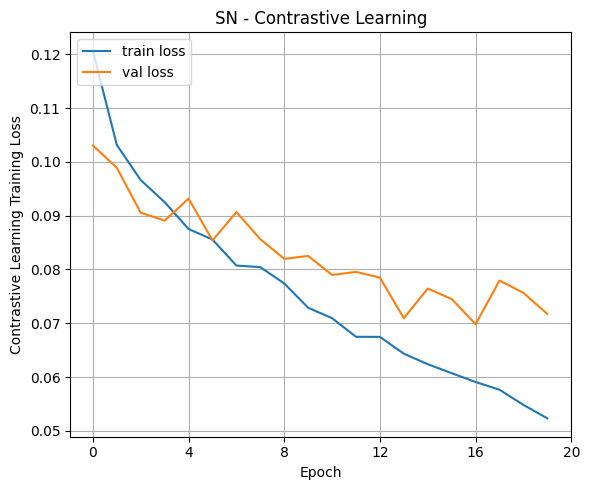

In [13]:
fig, ax = plt.subplots(1, figsize=(6, 5))

ax.plot(contrastive_history["train_loss"], label="train loss")
ax.plot(contrastive_history["val_loss"], label="val loss")
ax.set_title(f"{MODEL_NAME} - Contrastive Learning")
ax.set_ylabel("Contrastive Learning Training Loss")
ax.set_xlabel("Epoch")
ax.legend(loc="upper left")
ax.set_xticks(range(0, 21, 4))
ax.grid()

fig.tight_layout()

In [14]:
y_test_str = [y_mapping[label] for label in y_test]
y_pred_str = [y_mapping[label] for label in y_pred]

clf_scores_df, per_class_clf_scores_df = get_clf_report_dfs(
    y_true=y_test_str, y_pred=y_pred_str,
    clf_scores_path=os.path.join(RESULTS_DIR, f"{MODEL_NAME}_clf_scores.csv"),
    clf_per_class_scores_path=os.path.join(RESULTS_DIR, f"{MODEL_NAME}_per_class_clf_scores.csv")
)

clf_scores_df

,accuracy,f1-score macro avg,f1-score weighted avg,precision macro avg,precision weighted avg,recall macro avg,recall weighted avg
0,0.74359,0.729275,0.72583,0.8,0.80464,0.754167,0.74359


In [15]:
per_class_clf_scores_df.style.background_gradient(cmap="Blues")

,precision,recall,f1-score,support
ball,0.666667,1.000000,0.800000,4.000000
bigball,0.500000,0.600000,0.545455,5.000000
box,0.833333,1.000000,0.909091,5.000000
button,1.000000,0.500000,0.666667,6.000000
case,0.666667,0.800000,0.727273,5.000000
cube,0.666667,0.800000,0.727273,5.000000
cylinder,0.800000,0.800000,0.800000,5.000000
jenga,0.714286,1.000000,0.833333,5.000000
labello,0.714286,1.000000,0.833333,5.000000
lemon,1.000000,0.400000,0.571429,5.000000


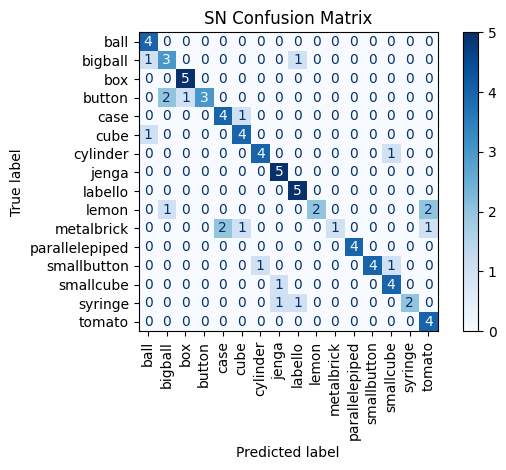

In [16]:
plot_confusion_matrix(
    y_true=y_test_str,
    y_pred=y_pred_str,
    title=f"{MODEL_NAME} Confusion Matrix",
    path=os.path.join(RESULTS_DIR, f"{MODEL_NAME}_confusion_matrix.png")
)